In [3]:
import pandas as pd
import numpy as np
import matplotlib
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
df = pd.read_csv('hotel_bookings_data.csv')

- `DATA PREPARATION`

In [5]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.00,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.00,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,0,No Deposit,394.0,NaN,0,Personal,96.14,0,0,Check-Out
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,0,No Deposit,9.0,NaN,0,Personal,225.43,0,2,Check-Out
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,0,No Deposit,9.0,NaN,0,Personal,157.71,0,4,Check-Out
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,0,No Deposit,89.0,NaN,0,Personal,104.40,0,0,Check-Out


About Dataset

Dataset contains customer behavior features who made hotel
bookings

- SHAPE = 119.390 data rows, 29 features

- DTYPE = Float64 (4 features), int64 (16 features), object (9 features)

- MISSING VALUE = 4 features that has missing value; company, agent, city, children

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

- `MENGECEK DATA DUPLIKAT DAN DATA NULL PADA DATASET`

In [7]:
df.duplicated().sum()

33261

In [8]:
duplicated = df.duplicated().sum() *100/len(df)
print(round(duplicated))

28


Terdapat Data Duplikat Sebanyak 33.261 Baris Pada Dataset Ini Atau 28 % Dari Total Baris Dataset

In [9]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [10]:
missing_value = df.isna().sum() *100/len(df)
print(round(missing_value, 3).sort_values(ascending=False))

company                           94.307
agent                             13.686
city                               0.409
children                           0.003
hotel                              0.000
is_repeated_guest                  0.000
total_of_special_requests          0.000
required_car_parking_spaces        0.000
adr                                0.000
customer_type                      0.000
days_in_waiting_list               0.000
deposit_type                       0.000
booking_changes                    0.000
previous_bookings_not_canceled     0.000
previous_cancellations             0.000
market_segment                     0.000
distribution_channel               0.000
is_canceled                        0.000
meal                               0.000
babies                             0.000
adults                             0.000
stays_in_weekdays_nights           0.000
stays_in_weekend_nights            0.000
arrival_date_day_of_month          0.000
arrival_date_wee

Terdapat Data Null Pada Kolom Company, Agent, City, Children

- Company  = 112.593 Baris = 94,3  %
- Agent    = 16.340 Baris = 13,6  %
- City     = 488 Baris = 0,4   %
- Children = 4 Baris = 0,003 %

- `HANDLING MISSING VALUES`

In [11]:
df.drop_duplicates(subset=None , keep="first", inplace=True)

In [12]:
df['company'] = df['company'].fillna(0)
df['agent'] = df['agent'].fillna(0)
df['children'] = df['children'].fillna(0)
df['city'] = df['city'].fillna('unknown')
df = df.replace({'meal': {'Undefined':'No Meal'}})

In [13]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Terdapat 4 Kolom Yang Memiliki Nilai Null Yaitu Company, Agent, City, Children.
- Isi Company Dengan 0, Karena NaN Menunjukkan Booking Bukan Dari Perusahaan
- Isi Agent Dengan 0, Karena NaN Menunjukkan Booking Tidak Melalui Agen
- Isi Kota Dengan ‘unknown', Karena Asal Kota Tidak Diketahui
- Isi Children dengan 0, Mediannya Adalah 0 Atau Mengindikasikan Bahwa Pelanggan Tidak Memiliki Anak Kemudian Ubah ‘undefined' Menjadi ‘no meal’

In [14]:
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['company'] = df['company'].astype('int64')

Mengubah Beberapa Kolom Yang Memiliki Tipe Data Yang Tidak Sesuai Menjadi Sesuai Agar Memudahkan Dalam Tahap Selanjutnya

- `FEATURE ENGINEERING`

In [15]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']

Menambahkan Kolom Baru Yang Relevan Seperti 'total_guest' Menjumlahkan Total Guest Yang Melakukan Booking Dengan Membawa Anak Dan Bayi, Lalu Menambahkan Kolom 'stay_duration' Agar Bisa Mengetahui Durasi Guest Menginap Di Hotel

In [16]:
df = df[(df['total_guests'] > 0) & (df['stay_duration'] > 0)]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85378 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           85378 non-null  object 
 1   is_canceled                     85378 non-null  int64  
 2   lead_time                       85378 non-null  int64  
 3   arrival_date_year               85378 non-null  int64  
 4   arrival_date_month              85378 non-null  object 
 5   arrival_date_week_number        85378 non-null  int64  
 6   arrival_date_day_of_month       85378 non-null  int64  
 7   stays_in_weekend_nights         85378 non-null  int64  
 8   stays_in_weekdays_nights        85378 non-null  int64  
 9   adults                          85378 non-null  int64  
 10  children                        85378 non-null  int64  
 11  babies                          85378 non-null  int64  
 12  meal                           

- `MONTHLY HOTEL BOOKING ANALYSIS BASED ON HOTEL TYPE`

Menghitung Total Booking

In [18]:
df["arrival_date_num_month"] = pd.to_datetime(df['arrival_date_month'], format='%B').dt.month

In [19]:
df_monthly = df.groupby(["hotel", "arrival_date_month", "arrival_date_num_month", "arrival_date_year"]) \
        .agg({"hotel":"count"}) \
        .rename(columns={"hotel": "total_booking"}) \
        .reset_index()

df_monthly.sort_values(by=["hotel", "arrival_date_num_month", "arrival_date_year", ], inplace=True)
df_monthly.drop("arrival_date_num_month", axis=1, inplace=True)
df_monthly.set_index(["hotel", "arrival_date_month", "arrival_date_year"])

total_booking
hotel        arrival_date_month arrival_date_year               
City Hotel   January            2017                         753
                                2018                        2096
             February           2017                         988
                                2018                        1964
             March              2018                        1004
                                2019                        1670
             April              2018                        1608
                                2019                        1906
             May                2018                        2340
                                2019                        2437
             June               2018                        2376
                                2019                        2641
             July               2018                        2290
                                2019                        3031
             August             2018                        2215
                                2019                        2693
             September          2017                         370
                                2018                        2447
                                2019                        2840
             October            2017                        1051
                                2018                        2774
                                2019                        2648
             November           2017                        1531
                                2018                        2509
             December           2017                        1439
                                2018                        2570
Resort Hotel January            2017                         831
                                2018                        1164
             February           2017                         923
                                2018                        1121
             March              2018                         798
                                2019                        1106
             April              2018                        1124
                                2019                        1329
             May                2018                        1419
                                2019                        1166
             June               2018                        1313
                                2019                        1443
             July               2018                        1374
                                2019                        1489
             August             2018                        1197
                                2019                        1508
             September          2017                        1258
                                2018                        1349
                                2019                        1656
             October            2017                        1329
                                2018                        1585
                                2019                        1701
             November           2017                        1132
                                2018                        1254
             December           2017                        1090
                                2018                        1528

Menghitung Ammount Of Year

In [20]:
df_monthly_year = df_monthly.groupby(['hotel', 'arrival_date_month']).agg({'arrival_date_year':'count'})
df_monthly = df_monthly.merge(df_monthly_year, on = ['hotel', 'arrival_date_month'])
df_monthly.rename(columns={'total_guests':'total_booking', 'arrival_date_year_y':'ammount_of_year'}, inplace=True)

Menghitung Total Rata-Rata Booking

In [21]:
df_monthly_total = df_monthly.groupby(['hotel', 'arrival_date_month']).agg({'total_booking':'sum'})
df_monthly = df_monthly.merge(df_monthly_total, on = ['hotel', 'arrival_date_month'])
df_monthly.rename(columns={'total_booking_y':'total_booking'}, inplace=True)

In [22]:
del df_monthly['total_booking_x']
df_monthly = df_monthly.drop_duplicates()
df_monthly['avg_num_booking'] = round(df_monthly['total_booking']/df_monthly['ammount_of_year'])

In [23]:
table = pd.pivot_table(data=df_monthly,
                        index=['arrival_date_month'],
                        columns=['hotel'],
                        values='avg_num_booking')
table

hotel,City Hotel,Resort Hotel
arrival_date_month,,
April,1757.0,1226.0
August,2454.0,1352.0
December,2004.0,1309.0
February,1476.0,1022.0
January,1424.0,998.0
July,2660.0,1432.0
June,2508.0,1378.0
March,1337.0,952.0
May,2388.0,1292.0


In [24]:
df_monthly

,hotel,arrival_date_month,arrival_date_year_x,ammount_of_year,total_booking,avg_num_booking
0,City Hotel,January,2017,2,2849,1424.0
1,City Hotel,January,2018,2,2849,1424.0
2,City Hotel,February,2017,2,2952,1476.0
3,City Hotel,February,2018,2,2952,1476.0
4,City Hotel,March,2018,2,2674,1337.0
5,City Hotel,March,2019,2,2674,1337.0
6,City Hotel,April,2018,2,3514,1757.0
7,City Hotel,April,2019,2,3514,1757.0
8,City Hotel,May,2018,2,4777,2388.0
9,City Hotel,May,2019,2,4777,2388.0


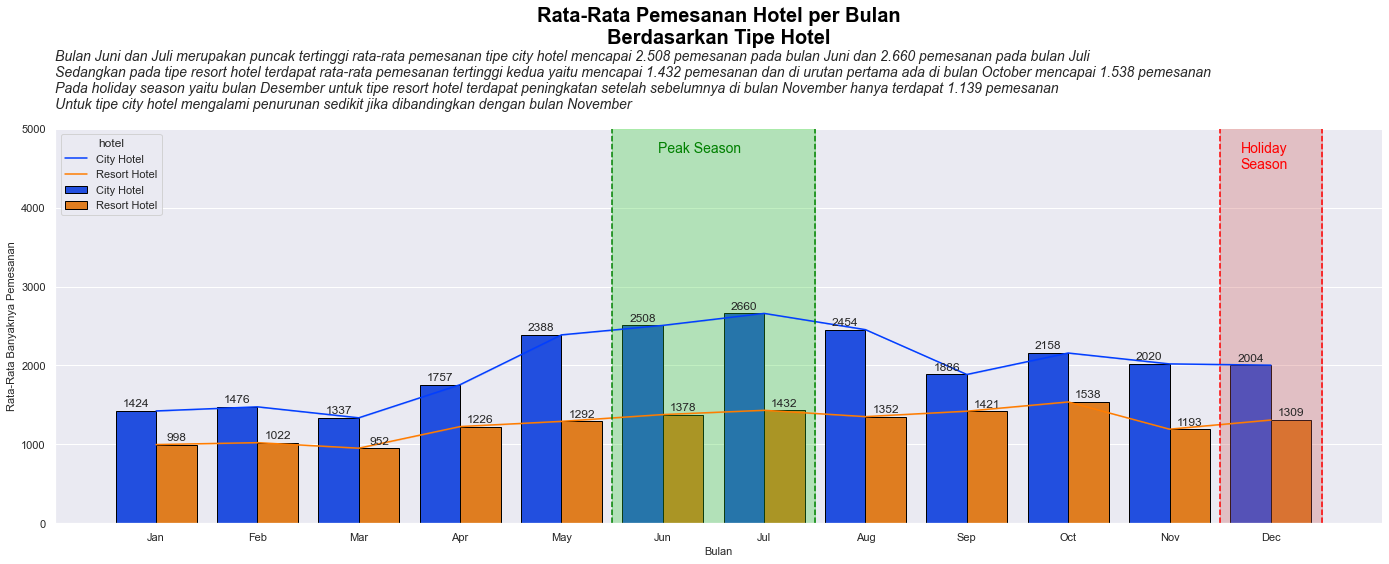

In [77]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.title("Rata-Rata Pemesanan Hotel per Bulan\nBerdasarkan Tipe Hotel", fontsize=20, color='black', weight='bold', pad=85)
plt.text(x=-1, y=5250, s="Bulan Juni dan Juli merupakan puncak tertinggi rata-rata pemesanan tipe city hotel mencapai 2.508 pemesanan pada bulan Juni dan 2.660 pemesanan pada bulan Juli\nSedangkan pada tipe resort hotel terdapat rata-rata pemesanan tertinggi kedua yaitu mencapai 1.432 pemesanan dan di urutan pertama ada di bulan October mencapai 1.538 pemesanan\nPada holiday season yaitu bulan Desember untuk tipe resort hotel terdapat peningkatan setelah sebelumnya di bulan November hanya terdapat 1.139 pemesanan\nUntuk tipe city hotel mengalami penurunan sedikit jika dibandingkan dengan bulan November", fontsize=14, fontstyle='italic')
sns.barplot(x='arrival_date_month', y='avg_num_booking', data=df_monthly, hue='hotel', edgecolor='black', palette='bright')
sns.lineplot(x='arrival_date_month', y ='avg_num_booking', data=df_monthly, hue='hotel', palette='bright')

plt.xlabel('Bulan', fontsize=11)
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Rata-Rata Banyaknya Pemesanan', fontsize=11)
plt.ylim(0, 5000)

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.axvline(4.5, ls='--', color='green')
plt.axvline(6.5, ls='--', color='green')
plt.stackplot(np.arange(4.5,7.5), [[5000]], color='limegreen', alpha=0.3)
plt.text(x=4.95, y=4750, s='Peak Season', fontsize=14, color='green', va='center')

plt.axvline(10.5, ls='--', color='red')
plt.axvline(11.5, ls='--', color='red')
plt.stackplot(np.arange(10.5,12.5), [[5000]], color='indianred', alpha=0.3)
plt.text(x=10.7, y=4650, s='Holiday\nSeason', fontsize=14, color='red', va='center')

sns.despine()
plt.tight_layout()
plt.savefig('avg_num_booking.png', dpi=200)

- `Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates`

In [82]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration,arrival_date_num_month,stay_duration_group
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,Personal,75.00,0,0,Check-Out,1,1,9,1 Week
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,Personal,75.00,0,0,Check-Out,1,1,9,1 Week
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,Personal,98.00,0,1,Check-Out,2,2,9,1 Week
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,...,0,Personal,107.00,0,0,Check-Out,2,2,9,1 Week
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,...,0,Personal,103.00,0,1,Check-Out,2,2,9,1 Week
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,0,Personal,96.14,0,0,Check-Out,2,7,10,1 Week
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,0,Personal,225.43,0,2,Check-Out,3,7,10,1 Week
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,0,Personal,157.71,0,4,Check-Out,2,7,10,1 Week
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,0,Personal,104.40,0,0,Check-Out,2,7,10,1 Week


Membuat Durasi Menginap Berdasarkan per Minggu

In [81]:
duration_list = []
for i in df['stay_duration']:
    if i >= 1 and i <= 7:
        group = '1 Week'
    elif i >= 8 and i <= 14:
        group = '2 Weeks'
    elif i >= 15 and i <= 21:
        group = '3 Weeks'
    else: 
        group = '4 Weeks'
    duration_list.append(group)
df['stay_duration_group'] = duration_list

In [83]:
df['stay_duration_group'].value_counts()

1 Week     80560
2 Weeks     4459
3 Weeks      234
4 Weeks      125
Name: stay_duration_group, dtype: int64

Membuat Cancellation Rate

In [85]:
df_cancel = df.groupby(['hotel', 'stay_duration_group', 'is_canceled']).agg({'agent':'count'}).reset_index()
df_cancel.rename(columns={'agent':'num_booking'}, inplace=True)


df_sum = df_cancel.groupby(['hotel', 'stay_duration_group']).agg({'num_booking':'sum'}).reset_index()
df_sum.rename(columns={'num_booking':'sum_booking'}, inplace=True)
df_cancel = df_cancel.merge(df_sum, on=['hotel', 'stay_duration_group'])

#membuat cancellation rate
df_cancel['cancellation_rate'] = round((df_cancel['num_booking']/df_cancel['sum_booking'])*100, 2)
df_cancel

,hotel,stay_duration_group,is_canceled,num_booking,sum_booking,cancellation_rate
0,City Hotel,1 Week,0,35845,51037,70.23
1,City Hotel,1 Week,1,15192,51037,29.77
2,City Hotel,2 Weeks,0,486,1009,48.17
3,City Hotel,2 Weeks,1,523,1009,51.83
4,City Hotel,3 Weeks,0,27,100,27.00
5,City Hotel,3 Weeks,1,73,100,73.00
6,City Hotel,4 Weeks,0,6,45,13.33
7,City Hotel,4 Weeks,1,39,45,86.67
8,Resort Hotel,1 Week,0,22665,29523,76.77
9,Resort Hotel,1 Week,1,6858,29523,23.23


Memfilter Data Pemesanan Hotel Yang Dicancel

In [87]:
df_cancel_final = df_cancel[df_cancel['is_canceled']==1].sort_values('stay_duration_group', ascending=True)
df_cancel_final

,hotel,stay_duration_group,is_canceled,num_booking,sum_booking,cancellation_rate
1,City Hotel,1 Week,1,15192,51037,29.77
9,Resort Hotel,1 Week,1,6858,29523,23.23
3,City Hotel,2 Weeks,1,523,1009,51.83
11,Resort Hotel,2 Weeks,1,939,3450,27.22
5,City Hotel,3 Weeks,1,73,100,73.00
13,Resort Hotel,3 Weeks,1,47,134,35.07
7,City Hotel,4 Weeks,1,39,45,86.67
15,Resort Hotel,4 Weeks,1,26,80,32.50


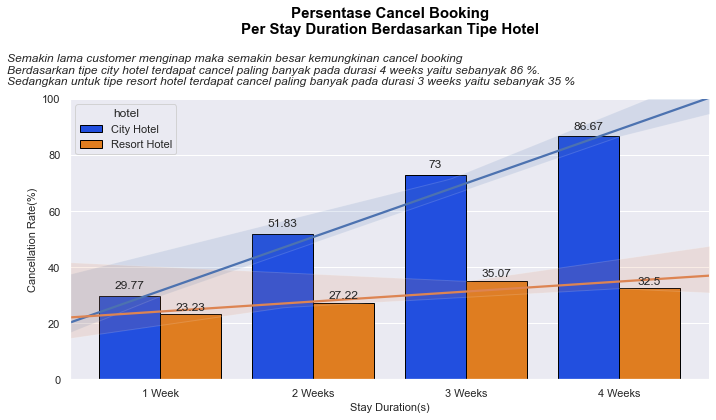

In [99]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Persentase Cancel Booking\nPer Stay Duration Berdasarkan Tipe Hotel", fontsize=15, color='black', weight='bold', pad=65)
plt.text(x=-1, y=105, s="Semakin lama customer menginap maka semakin besar kemungkinan cancel booking\nBerdasarkan tipe city hotel terdapat cancel paling banyak pada durasi 4 weeks yaitu sebanyak 86 %.\nSedangkan untuk tipe resort hotel terdapat cancel paling banyak pada durasi 3 weeks yaitu sebanyak 35 %", fontsize=12, fontstyle='italic')
sns.barplot(x='stay_duration_group', y='cancellation_rate', data=df_cancel_final, hue='hotel', edgecolor='black', palette='bright')

sns.regplot(x=np.arange(0, len(df_cancel_final[df_cancel_final['hotel'] == 'City Hotel'])), y='cancellation_rate', 
            data=df_cancel_final[df_cancel_final['hotel'] == 'City Hotel'], scatter=False, label = 'Trend City Hotel', truncate=False)
sns.regplot(x=np.arange(0, len(df_cancel_final[df_cancel_final['hotel'] == 'City Hotel'])), y='cancellation_rate', 
            data=df_cancel_final[df_cancel_final['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel', truncate=False)

plt.xlabel('Stay Duration(s)', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)
plt.ylim(0, 100)

plt.bar_label(ax.containers[0], padding=5)
plt.bar_label(ax.containers[1], padding=2)

sns.despine()
plt.tight_layout()
plt.savefig('cancelrate_stayduration.png', dpi=200)

- `Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate`

In [90]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration,arrival_date_num_month,stay_duration_group,lead_time_group
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,Personal,75.00,0,0,Check-Out,1,1,9,1 Week,1 Month
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,Personal,75.00,0,0,Check-Out,1,1,9,1 Week,1 Month
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,Personal,98.00,0,1,Check-Out,2,2,9,1 Week,1 Month
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,...,Personal,107.00,0,0,Check-Out,2,2,9,1 Week,1 Month
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,...,Personal,103.00,0,1,Check-Out,2,2,9,1 Week,1 Month
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,Personal,96.14,0,0,Check-Out,2,7,10,1 Week,1 Month
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,Personal,225.43,0,2,Check-Out,3,7,10,1 Week,2-4 Months
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,Personal,157.71,0,4,Check-Out,2,7,10,1 Week,2-4 Months
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,Personal,104.40,0,0,Check-Out,2,7,10,1 Week,2-4 Months


In [89]:
lead_time_list=[]
for i in df['lead_time']:
    if i <= 30:
        lead_group = '1 Month'
    elif i >= 31 and i <= 120:
        lead_group = '2-4 Months'
    elif i >= 121 and i <= 210:
        lead_group = '5-7 Months'
    elif i >= 211 and i <= 300:
        lead_group = '8-10 Months'
    elif i >= 311 and i <= 360:
        lead_group = '11-12 Months'
    else: 
        lead_group = '>12 Months'
    lead_time_list.append(lead_group)
df['lead_time_group'] = lead_time_list

In [91]:
df['lead_time_group'].value_counts()

1 Month         33810
2-4 Months      29379
5-7 Months      14484
8-10 Months      5532
11-12 Months     1197
>12 Months        976
Name: lead_time_group, dtype: int64

In [92]:
df_lead = df.groupby(['hotel', 'lead_time_group', 'is_canceled']).agg({'agent':'count'}).reset_index()
df_lead.rename(columns={'agent':'num_booking'}, inplace=True)

#create sum booking column
df_sum = df_lead.groupby(['hotel', 'lead_time_group']).agg({'num_booking':'sum'}).reset_index()
df_sum.rename(columns={'num_booking':'sum_booking'}, inplace=True)
df_lead = df_lead.merge(df_sum, on=['hotel', 'lead_time_group'])

#create cancellation rate
df_lead['cancellation_rate'] = round((df_lead['num_booking']/df_lead['sum_booking'])*100, 2)
df_lead

,hotel,lead_time_group,is_canceled,num_booking,sum_booking,cancellation_rate
0,City Hotel,1 Month,0,16024,19951,80.32
1,City Hotel,1 Month,1,3927,19951,19.68
2,City Hotel,11-12 Months,0,205,517,39.65
3,City Hotel,11-12 Months,1,312,517,60.35
4,City Hotel,2-4 Months,0,12918,19574,66.00
5,City Hotel,2-4 Months,1,6656,19574,34.00
6,City Hotel,5-7 Months,0,5402,8721,61.94
7,City Hotel,5-7 Months,1,3319,8721,38.06
8,City Hotel,8-10 Months,0,1561,2870,54.39
9,City Hotel,8-10 Months,1,1309,2870,45.61


In [94]:
df_lead_final = df_lead[df_lead['is_canceled']==1].sort_values('lead_time_group', ascending=True)
df_lead_final

,hotel,lead_time_group,is_canceled,num_booking,sum_booking,cancellation_rate
1,City Hotel,1 Month,1,3927,19951,19.68
13,Resort Hotel,1 Month,1,1690,13859,12.19
3,City Hotel,11-12 Months,1,312,517,60.35
15,Resort Hotel,11-12 Months,1,288,680,42.35
5,City Hotel,2-4 Months,1,6656,19574,34.00
17,Resort Hotel,2-4 Months,1,3018,9805,30.78
7,City Hotel,5-7 Months,1,3319,8721,38.06
19,Resort Hotel,5-7 Months,1,1851,5763,32.12
9,City Hotel,8-10 Months,1,1309,2870,45.61
21,Resort Hotel,8-10 Months,1,898,2662,33.73


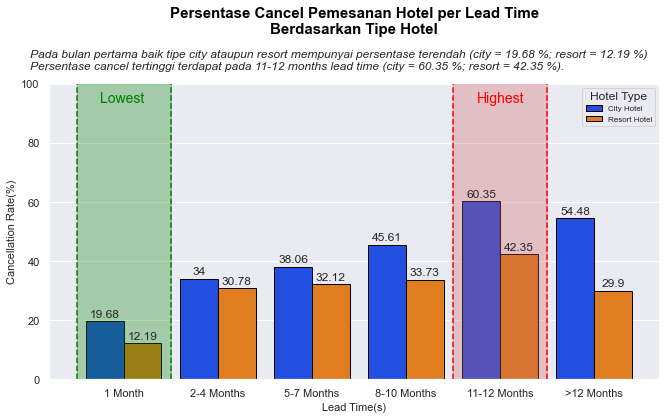

In [102]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Persentase Cancel Pemesanan Hotel per Lead Time\nBerdasarkan Tipe Hotel", fontsize=15, color='black', weight='bold', pad=50)
plt.text(x=-1, y=105, s="Pada bulan pertama baik tipe city ataupun resort mempunyai persentase terendah (city = 19.68 %; resort = 12.19 %)\nPersentase cancel tertinggi terdapat pada 11-12 months lead time (city = 60.35 %; resort = 42.35 %).", fontsize=12, fontstyle='italic')
sns.barplot(x='lead_time_group', y='cancellation_rate', data=df_lead_final, hue='hotel', order=['1 Month', '2-4 Months', '5-7 Months', '8-10 Months', '11-12 Months', '>12 Months'], edgecolor='black', palette='bright')

plt.xlabel('Lead Time(s)', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)
plt.ylim(0, 100)

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.axvline(3.5, ls='--', color='red')
plt.axvline(4.5, ls='--', color='red')
plt.stackplot(np.arange(3.5,5.5), [[100]], color='indianred', alpha=0.3)
plt.text(x=3.75, y=95, s='Highest', fontsize=14, color='red', va='center')

plt.axvline(0.5, ls='--', color='green')
plt.axvline(-0.5, ls='--', color='green')
plt.stackplot(np.arange(-0.5,1.5), [[100]], color='green', alpha=0.3)
plt.text(x=-0.25, y=95, s='Lowest', fontsize=14, color='green', va='center')

plt.legend(title='Hotel Type', prop={'size':8}, loc=1)

sns.despine()
plt.tight_layout()
plt.savefig('cancelrate_leadtime.png', dpi=200)